## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


sns.set(style="whitegrid")


## 2. Load Dataset

In [ ]:
df = pd.read_csv('../data/raw/benin-malanville.csv', parse_dates=['Timestamp'])  
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


## 3. Summary Statistics & Missing Values

In [3]:
print("Summary statistics:\n", df.describe())
print("\nMissing values:\n", df.isna().sum())
print("\nColumns with >5% missing values:\n", (df.isna().mean() > 0.05))


Summary statistics:
                            Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-02-07 12:00:30.000000512     240.559452     167.187516   
min              2021-08-09 00:01:00     -12.900000      -7.800000   
25%              2021-11-08 06:00:45      -2.000000      -0.500000   
50%              2022-02-07 12:00:30       1.800000      -0.100000   
75%              2022-05-09 18:00:15     483.400000     314.200000   
max              2022-08-09 00:00:00    1413.000000     952.300000   
std                              NaN     331.131327     261.710501   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      115.358961     236.589496     228.883576      28.179683   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.200000   
50%

## 4. Outlier Detection with Z-score

Number of outliers per column:
 GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64


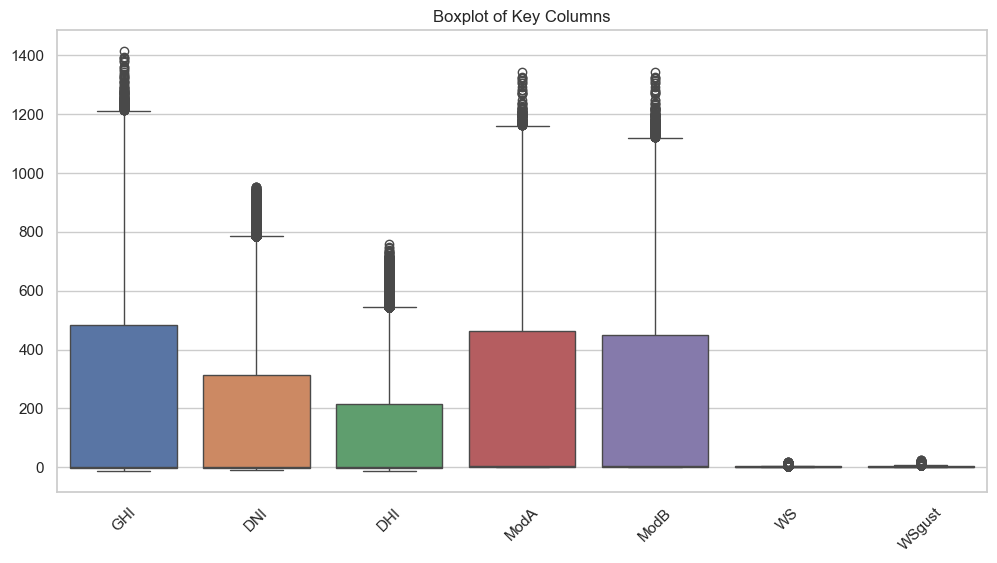

In [4]:

from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[columns].apply(zscore)

outliers = (z_scores.abs() > 3).sum()
print("Number of outliers per column:\n", outliers)


plt.figure(figsize=(12,6))
sns.boxplot(data=df[columns])
plt.xticks(rotation=45)
plt.title("Boxplot of Key Columns")
plt.show()

## 5. Handling Missing Values & Outliers

In [5]:
df[columns] = df[columns].fillna(df[columns].median())

df_clean = df[(z_scores.abs() <= 3).all(axis=1)]
print(f"Rows before cleaning: {len(df)}, after cleaning: {len(df_clean)}")

Rows before cleaning: 525600, after cleaning: 517860


## 6. Time Series Analysis

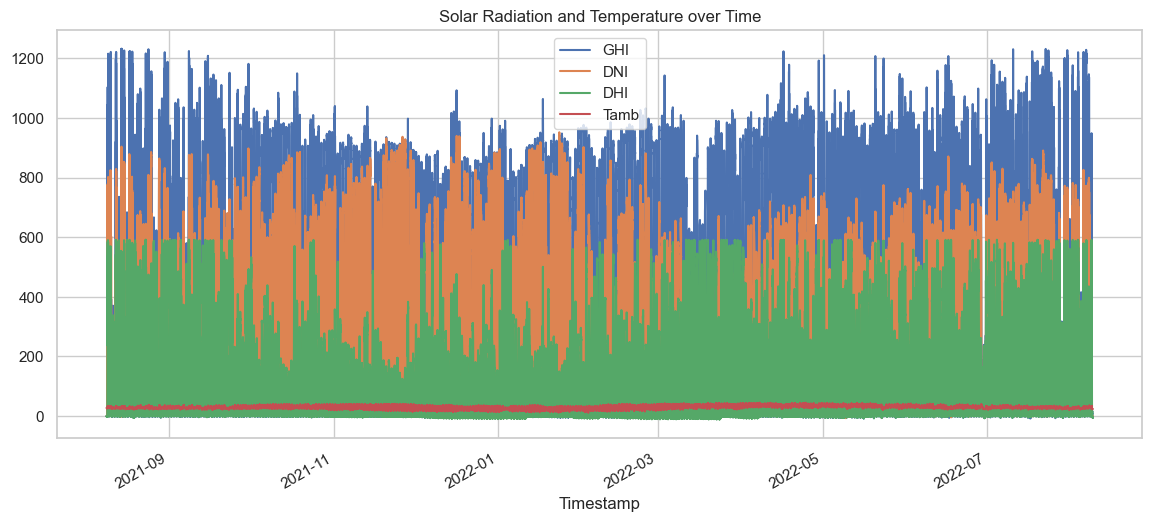

In [6]:
df_clean.set_index('Timestamp', inplace=True)
df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(14,6))
plt.title("Solar Radiation and Temperature over Time")
plt.show()

## 7. Cleaning Impact on Sensor Readings

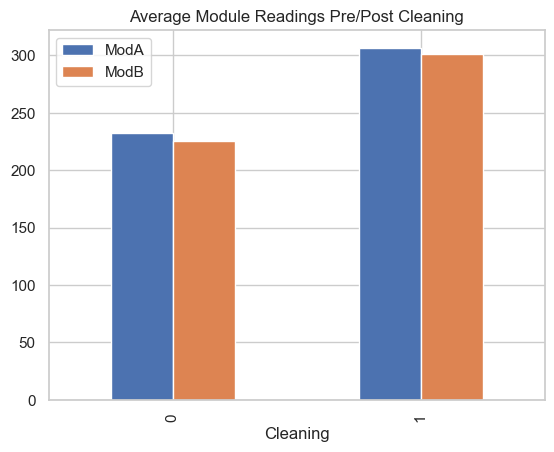

In [7]:
df_clean.reset_index(inplace=True)
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Average Module Readings Pre/Post Cleaning")
plt.show()

## 8. Correlation Heatmap

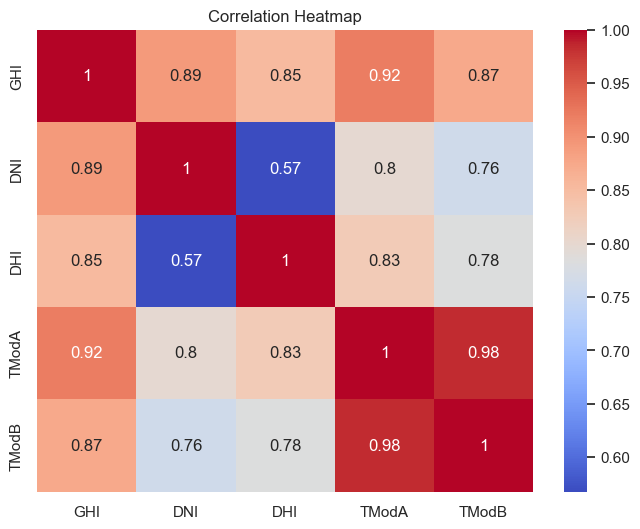

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 9. Scatter Plots

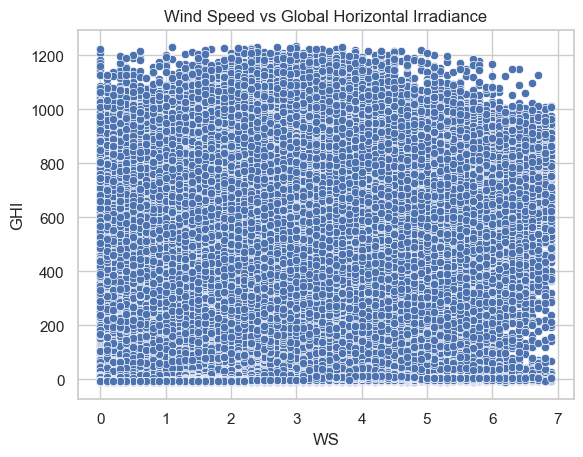

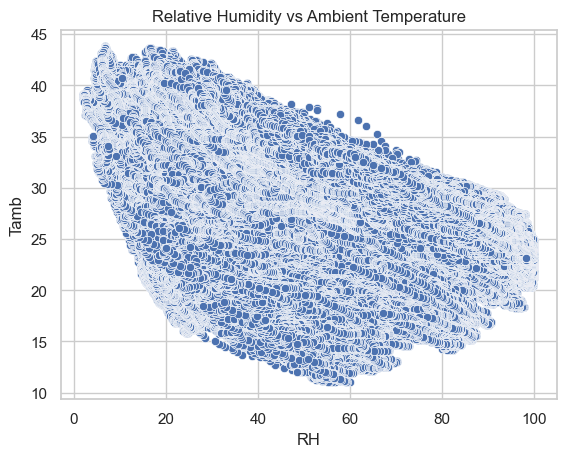

In [9]:
sns.scatterplot(x='WS', y='GHI', data=df_clean)
plt.title("Wind Speed vs Global Horizontal Irradiance")
plt.show()

sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title("Relative Humidity vs Ambient Temperature")
plt.show()


## 10. Wind & Distribution Analysis

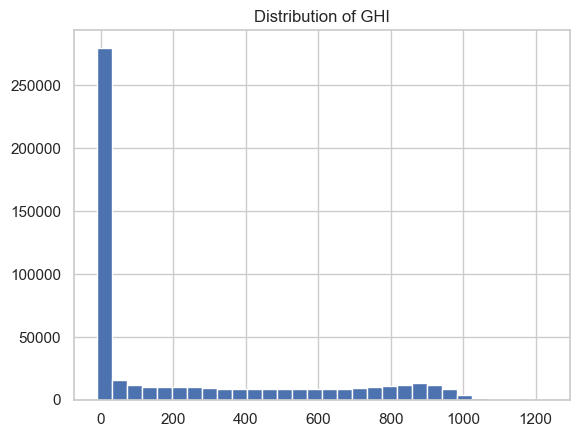

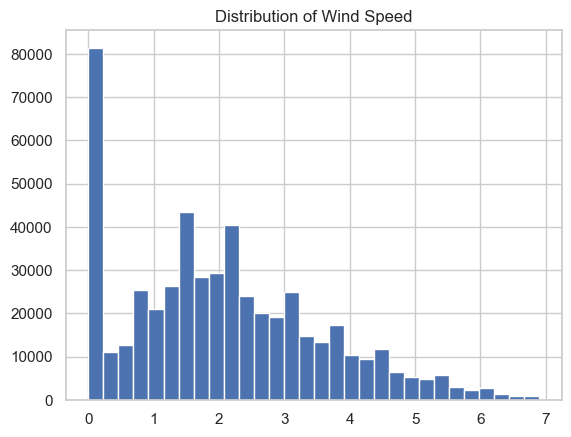

In [10]:
df_clean['GHI'].hist(bins=30)
plt.title("Distribution of GHI")
plt.show()

df_clean['WS'].hist(bins=30)
plt.title("Distribution of Wind Speed")
plt.show()


## 11. Temperature & Humidity Relationship (Bubble Chart)

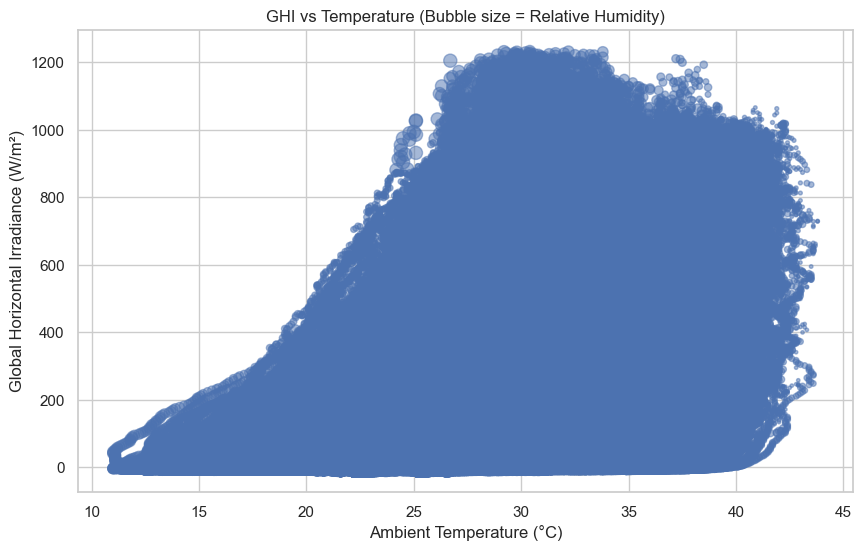

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(df_clean['Tamb'], df_clean['GHI'], s=df_clean['RH'], alpha=0.5)
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
plt.title("GHI vs Temperature (Bubble size = Relative Humidity)")
plt.show()


## 12. Save Cleaned Dataset

In [12]:
df_clean.to_csv('../data/cleaned/benin_clean.csv', index=False)